Thanks to Chris Said for notebook formatting:
http://chris-said.io/2016/02/13/how-to-make-polished-jupyter-presentations-with-optional-code-visibility/
And James Church for the basics:
https://www.youtube.com/watch?v=EOpcxy0RA1A
And Damian for inventing it!
http://www.damian.oquanta.info/posts/make-your-slides-with-ipython.html

c.f. Can produce pdf from slides in firefox (need fr offline presenting!)

In [5]:
## configure environment for notebook to run
from IPython.display import Image
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import graphlab
%matplotlib inline

# Data modelling: 
# Predicting bed availability in intensive care

&nbsp;

&nbsp;


## An Intensive Care Unit (ICU):



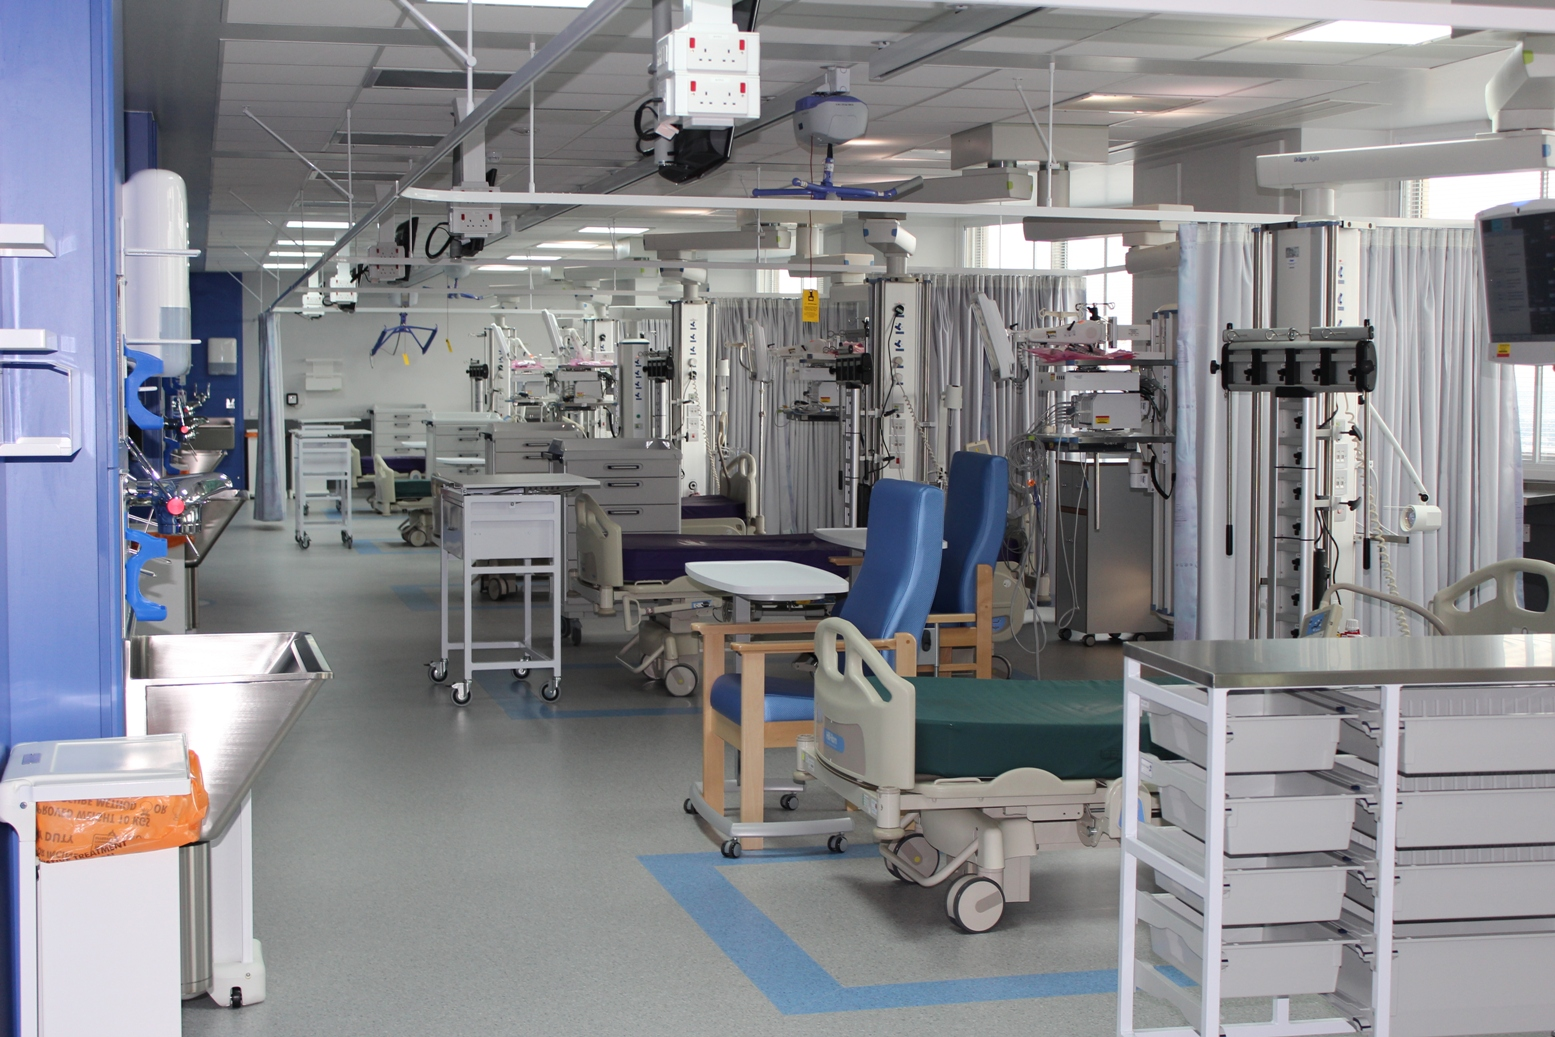

In [5]:
x = Image(filename='icu.JPG', width=600)
display(x)

### This is where you go when you are very sick:
- After major surgery
- Multiple organ failure
- Serious co-morbities, infections etc.

## Jeremy needs a serious operation.



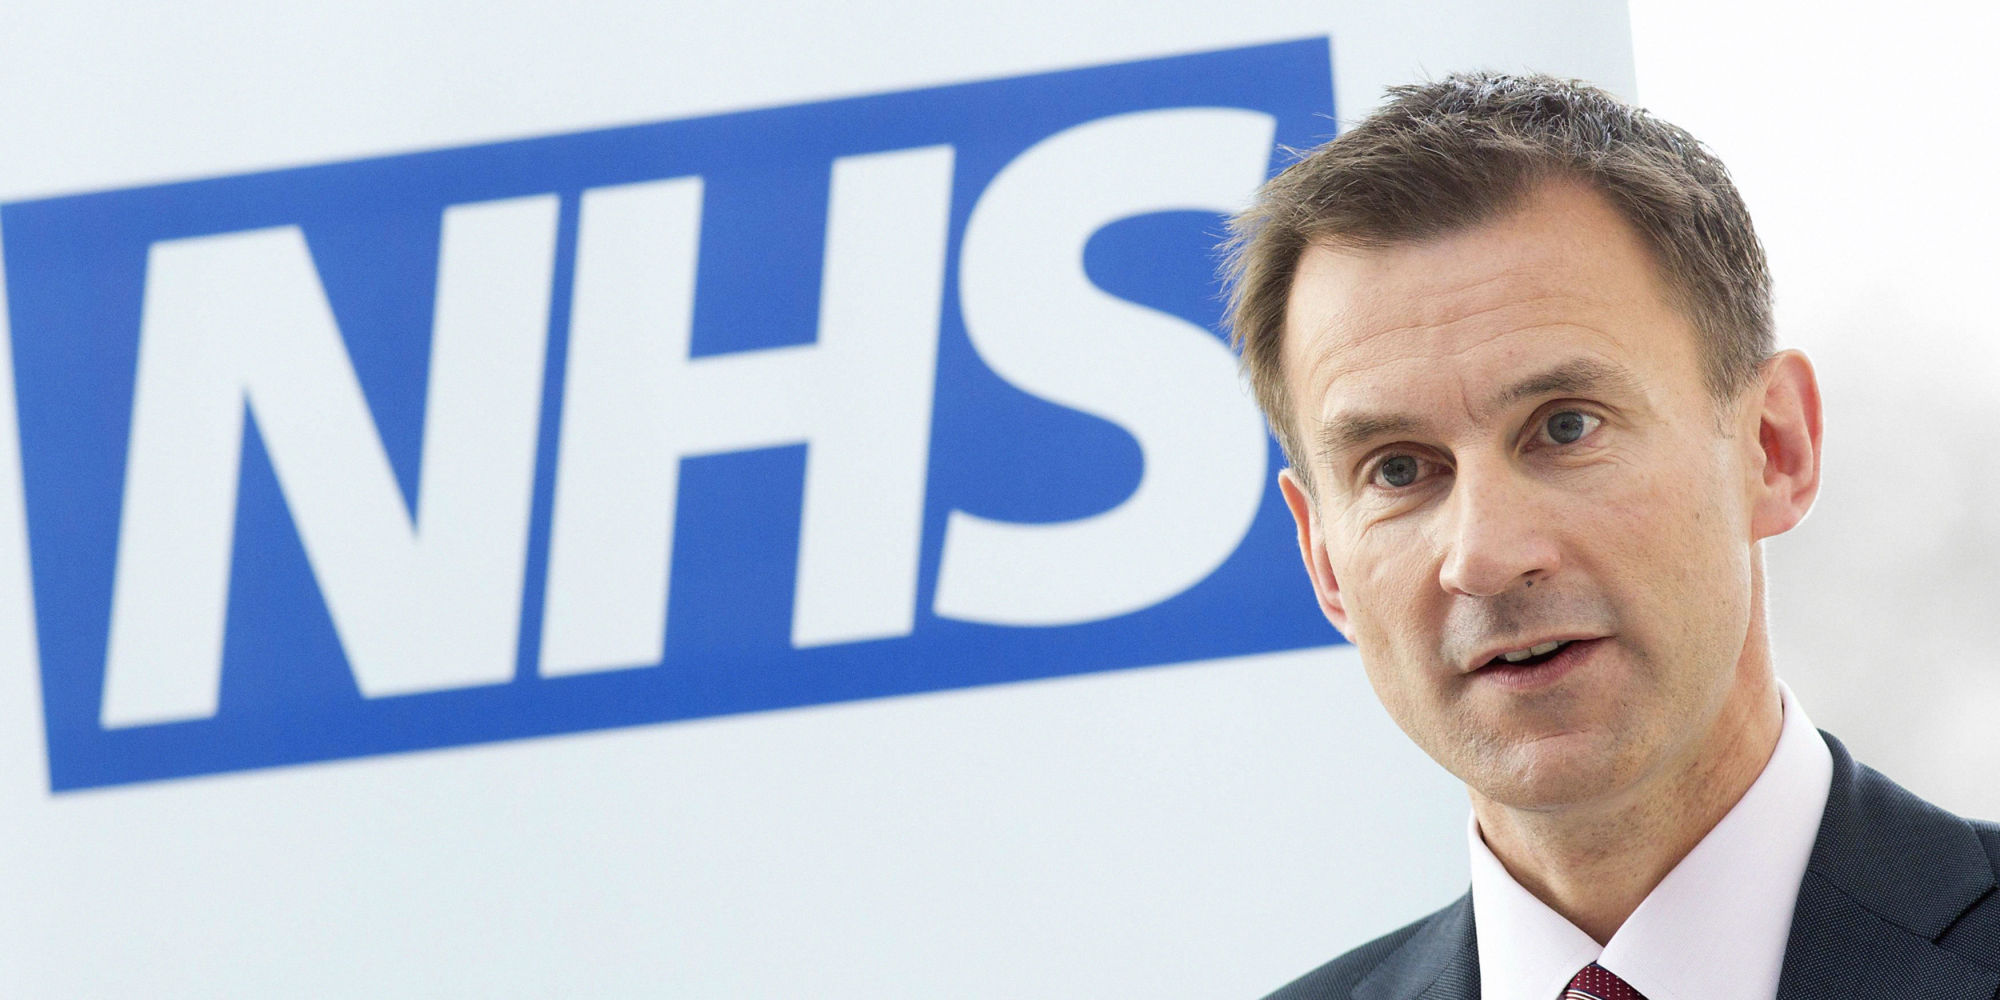

In [4]:
Image(filename='jeremy.jpg', width=600)

## But on the morning of his operation, the ICU is full.



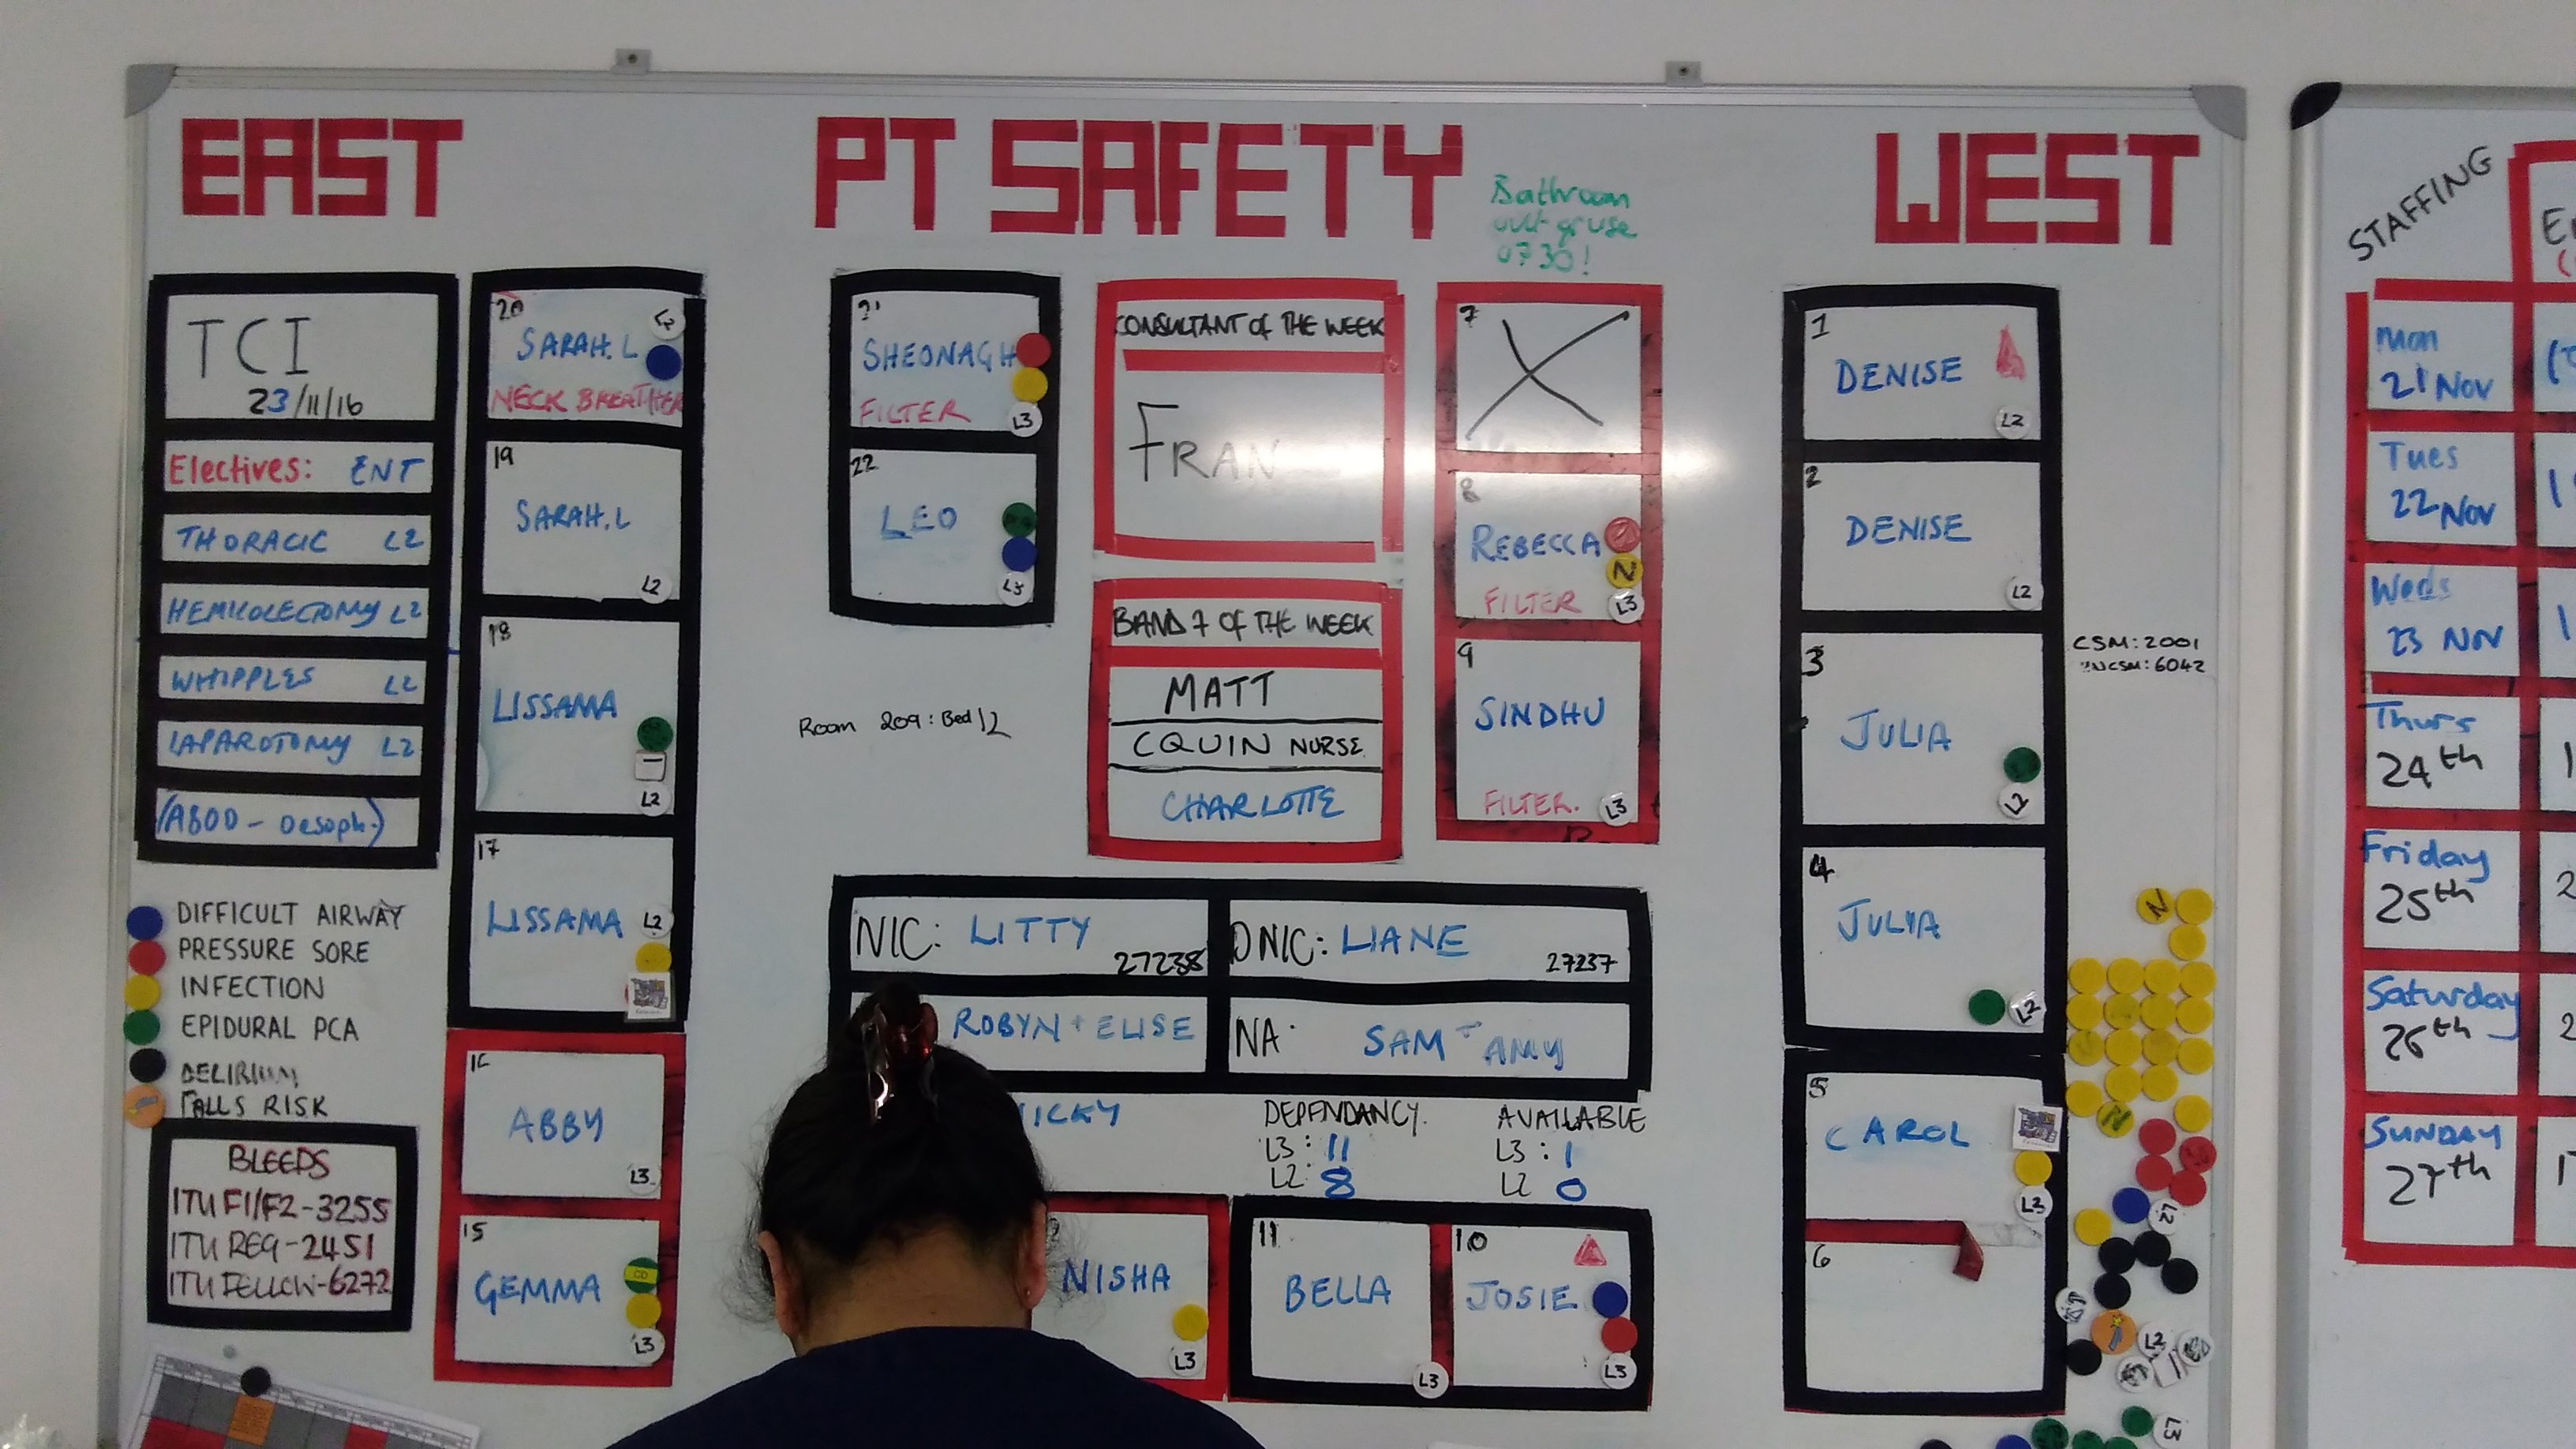

In [6]:
Image(filename='bed_plan.jpg', width=600)

## So..



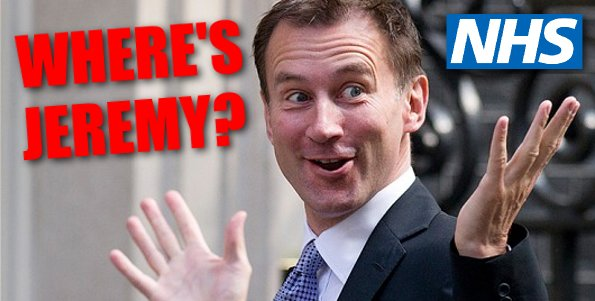

In [7]:
Image(filename='where_jez.jpg', width=600)

## Going to go after his operation?



## Nowhere.

## - His operation is cancelled.

## - The hospital receives a penalty fine.

## This situation is not uncommon..

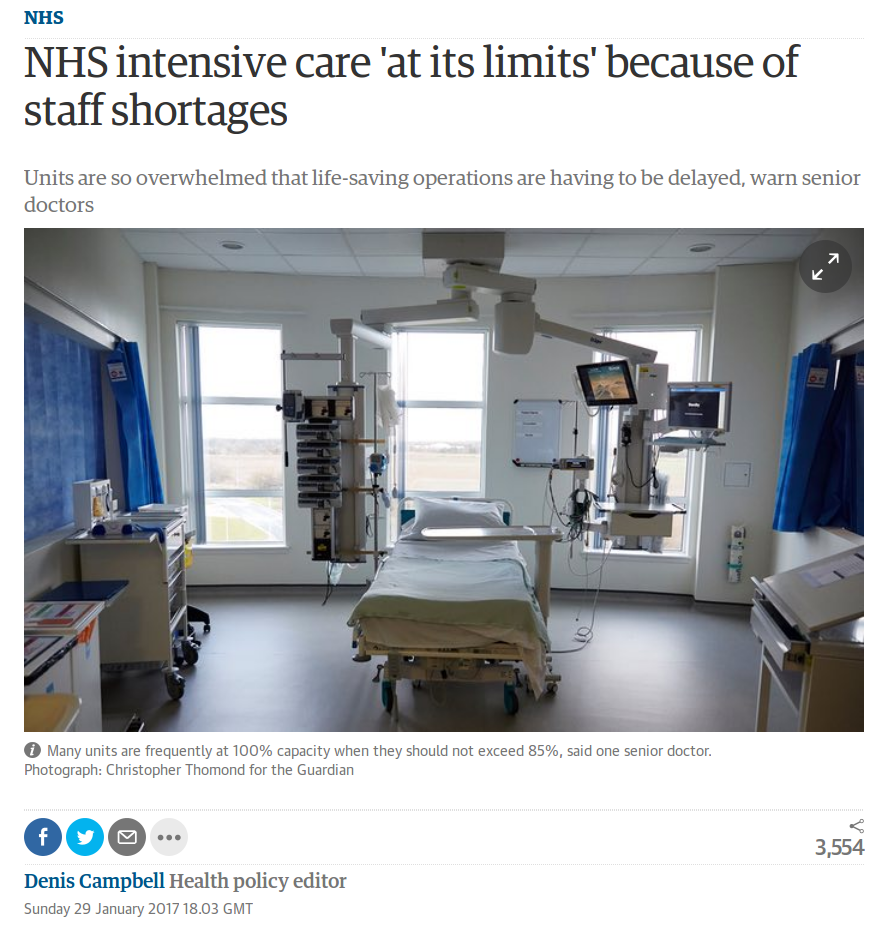

In [9]:
Image('news.png')

## What can be done?

### 1. More intensive care beds (and staff).

### 2. Better use of the available resources.

## Making better use of resources..



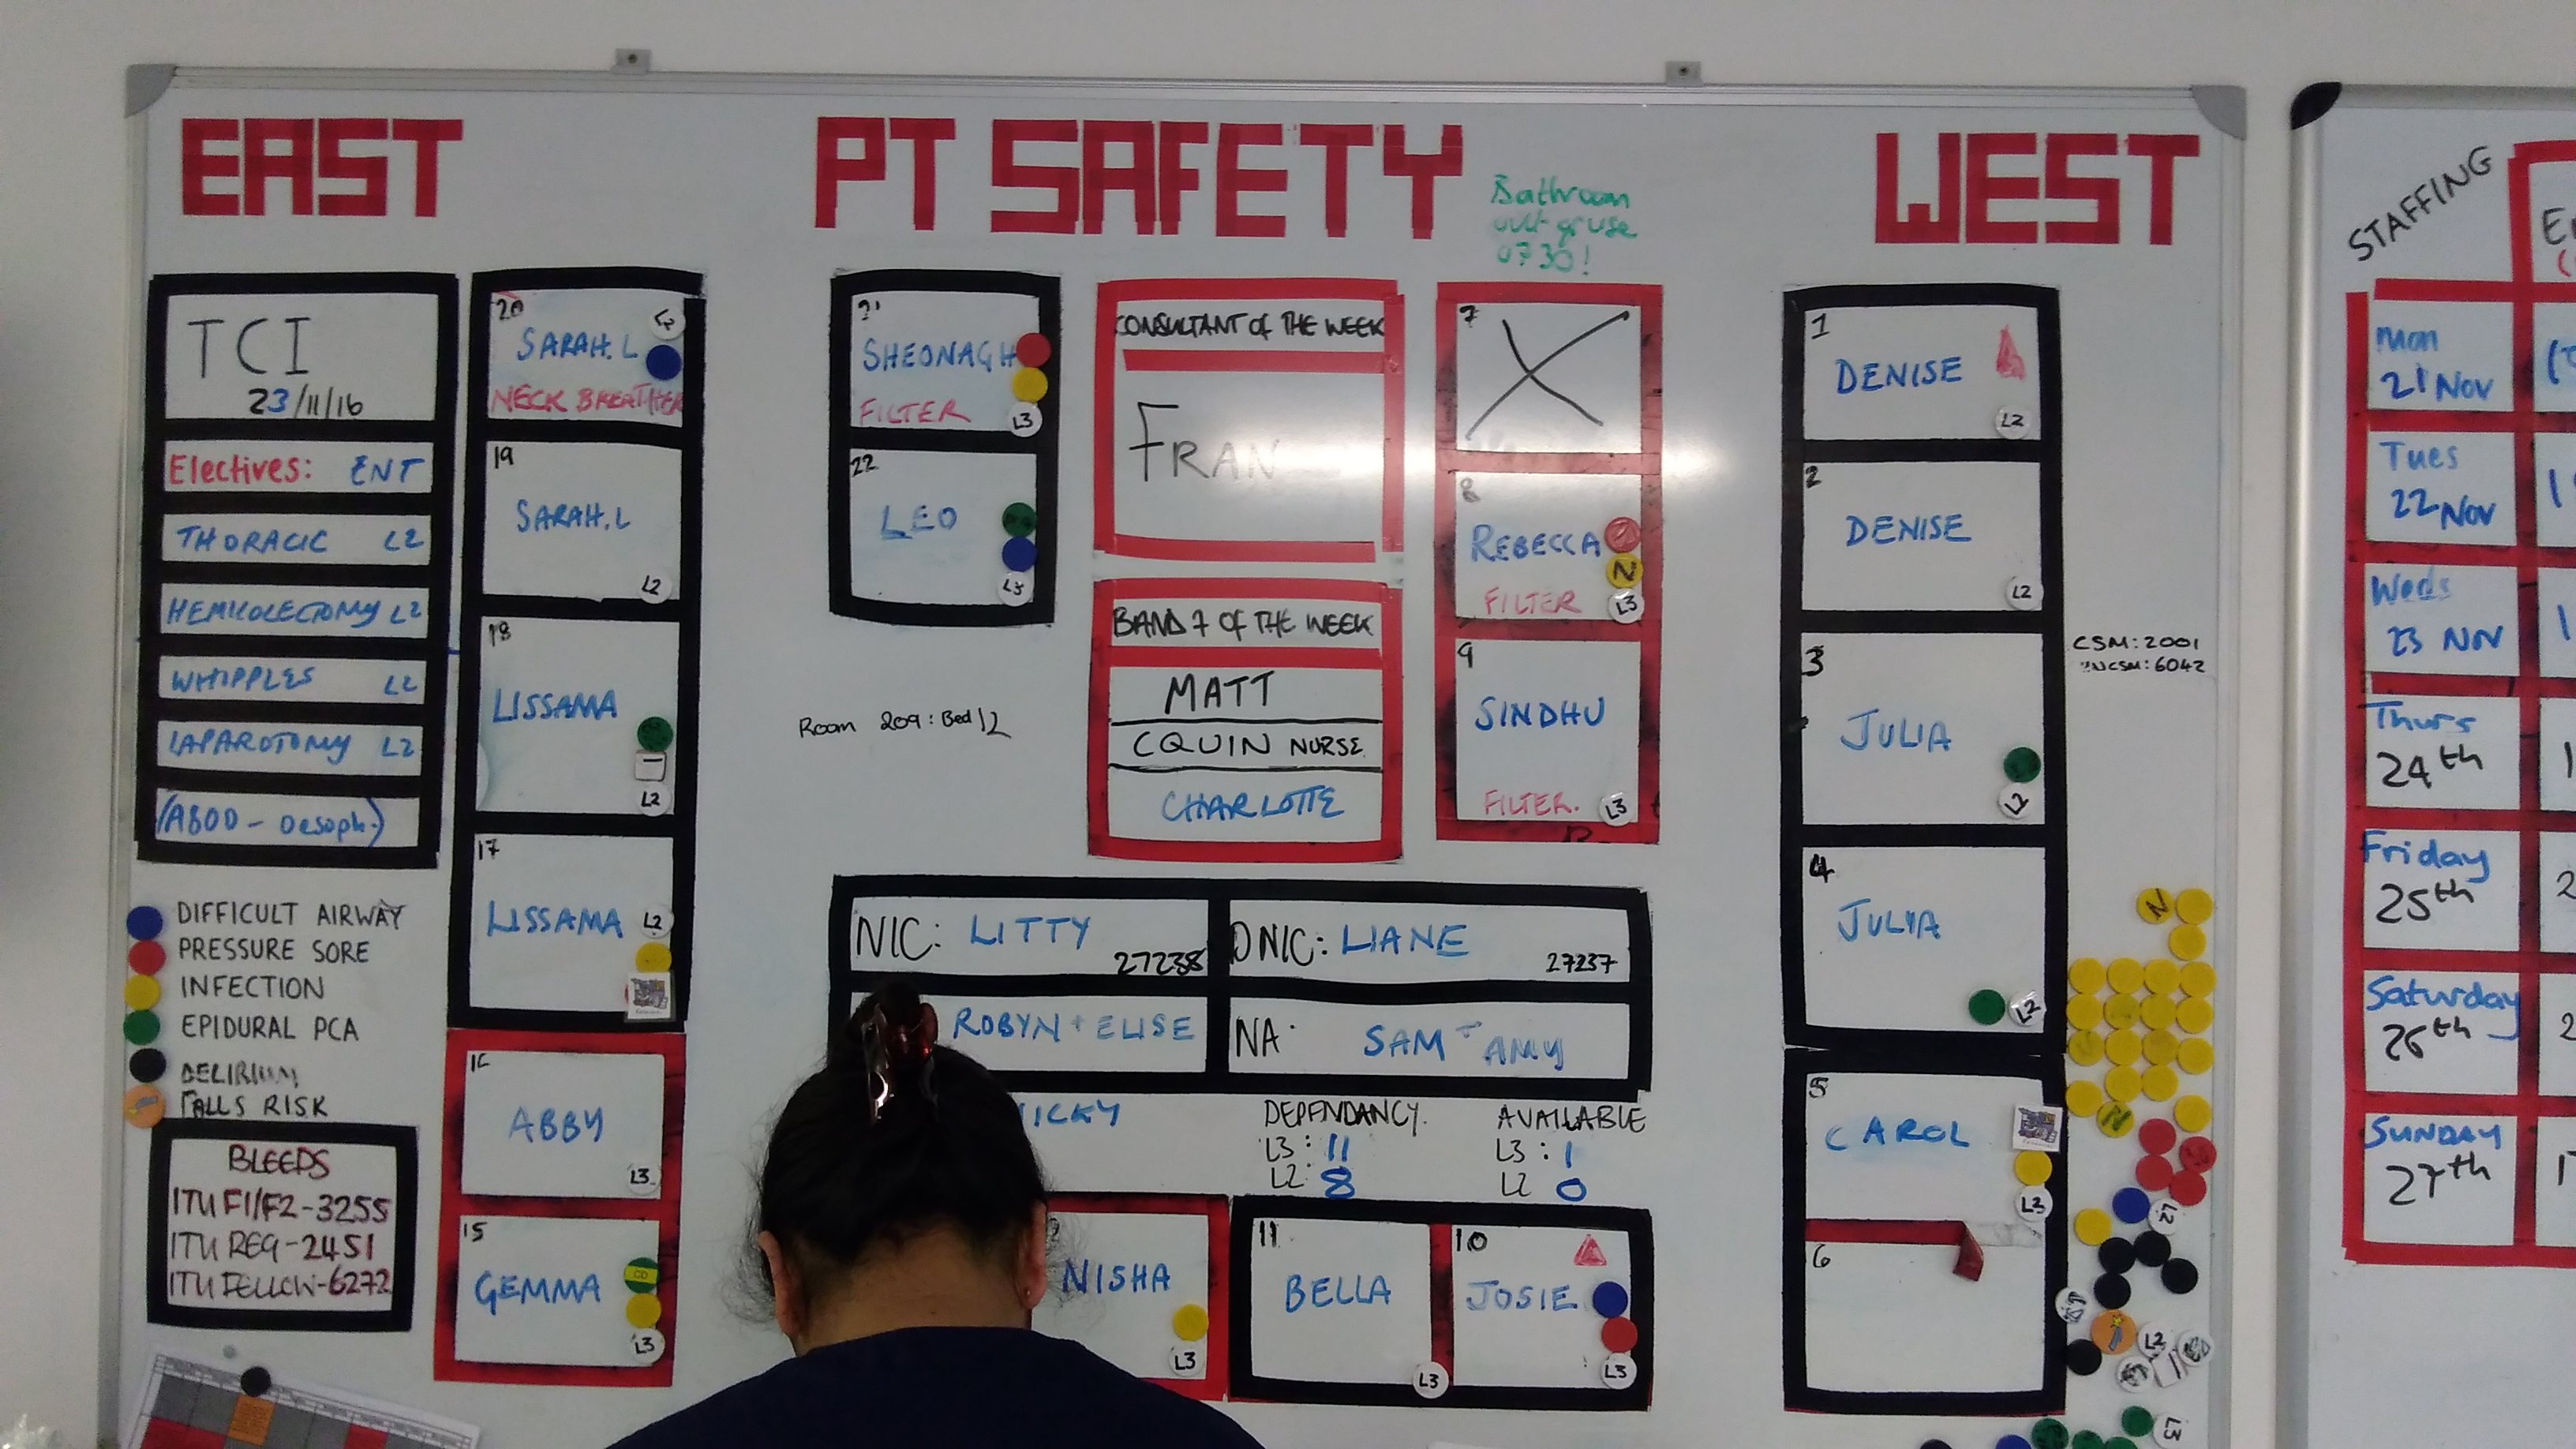

In [6]:
Image(filename='bed_plan.jpg', width=600)

## If we could predict when beds will become free:

- Schedule electives better
- Improve *'Flow management'* 



## The challenge:

# *Predict when patients will leave intensive care.*



## Specifically:

### Based on the data collected during the first 48 hours in intensive care, can you predict if a patient will still be undergoing treatment by the end of day X? 

## The data:



Real time series data for 4000 intensive care patients.
Split into:

**Training set:**
- 2000 ICU patients
- time series recordings of physiological parameters 
- demographic information
- outcomes

**Test set:**
- As traing set but no outcome information. 


### Physiological parameters: 

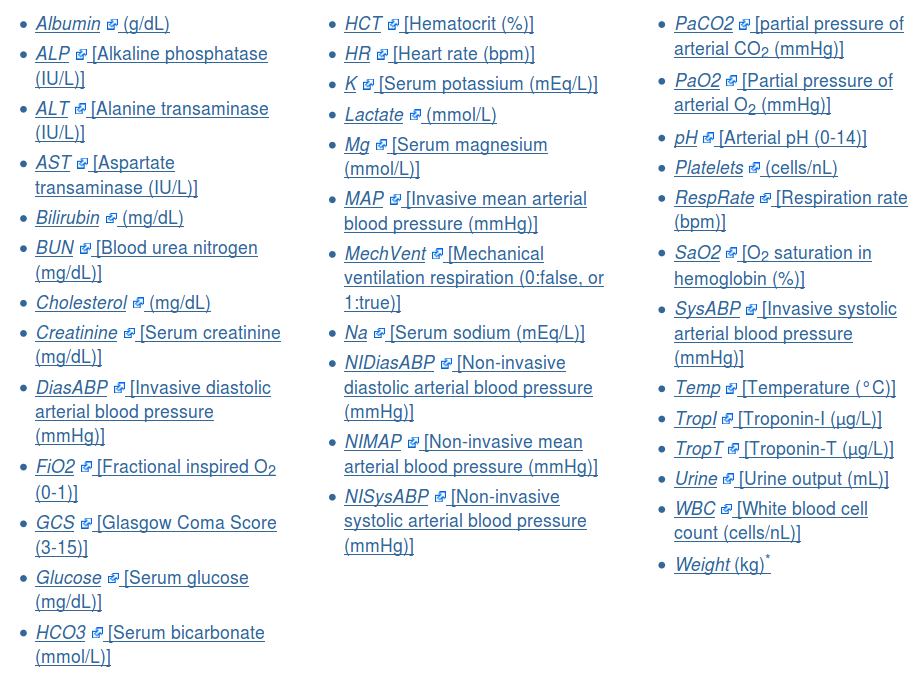

In [3]:
Image('variables.png')

In [20]:
## convert times
def hms_to_seconds(t):
    h, m = [int(i) for i in t.split(':')]
    return 60*h + m

example = graphlab.SFrame('../physionet_data/set-a/135897.txt')

def plot_var(example, variable, unit=''):
    times=list(example[example['Parameter']==variable]['Time'])
    values=list(example[example['Parameter']==variable]['Value'])
    times = [hms_to_seconds(time) for time in times]
    #print len(times)
    fsa = 15 
    plt.plot(times,values, '*-')
    plt.xlabel('minutes after ICU admission', fontsize=fsa)
    plt.ylabel('%s %s' %(variable,unit), fontsize=fsa)
    plt.xlim([0,2880])
    plt.grid()
    plt.show()

Assuming file is csv. For other delimiters, please use `SFrame.read_csv`.


Finished parsing file /home/rusty/Documents/postdoc/undergrad_project/physionet_data/set-a/135897.txt

Parsing completed. Parsed 100 lines in 0.049192 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/rusty/Documents/postdoc/undergrad_project/physionet_data/set-a/135897.txt

Parsing completed. Parsed 579 lines in 0.047962 secs.

#### For example the *Temperature* time series:

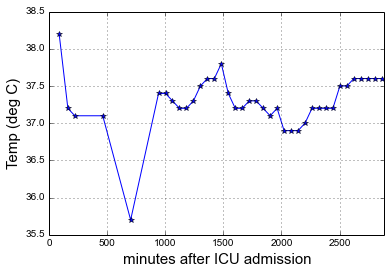

In [21]:
variable='Temp'
unit='(deg C)'
plot_var(example, variable, unit)

#### ..the *Heart rate* time series:

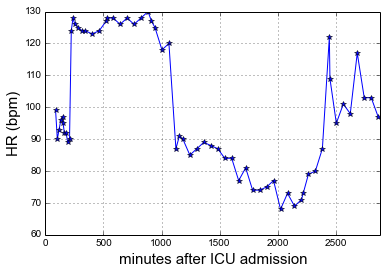

In [22]:
variable='HR'
unit='(bpm)'
plot_var(example, variable, unit)

#### ..or the *Alkaline phosphatase* time series:

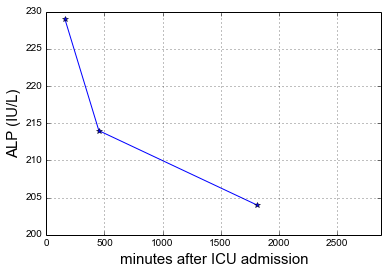

In [23]:
variable='ALP'
unit='(IU/L)'
plot_var(example, variable, unit)

#### ..and so on.

#### And importanlty, the OUTCOME information:

- Length of stay (in days, always > 2)
- In-hospital death (0: survivor, 1: died in-hospital)
- Survival (days)

- additionally: SAPS-I and SOFA score.

#### Missing data given by -1   

### Advice:

- You should build at least one predictive model or classifier.

- You should use the *training set* to train your model. But beware of overfitting, you also want it to perform well on the *test set*.

- Test the performance of your model using concepts such as *Recall*, *Precision*, and if possible *AUC* (the area under the ROC curve). 

- I would recommend starting with X = 5 days.

### Extensions (optional):

- Are there systematic difference between the training and test sets? What issues might this cause, and what could you do to overcome them?

- Think about the different reasons for leaving ICU. Can you account for these in your modelling? 

- Try developing a different model to predict the scalar length of stay (LOS). Use this new model to predict which patients will have left ICU by day X. How does this compare to your original results?

### An example solution...

Here is the ROC curve for an example model. 

Hint: you should be able to beat this performance!

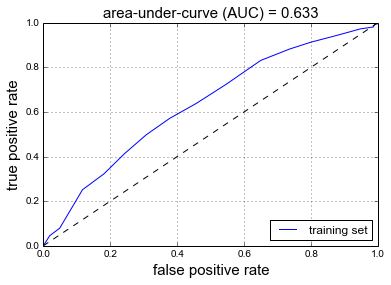

In [24]:
Image('sofa_classifier.png')

### Contacts:

1. Chris McWilliams:   <chris.mcwilliams@bristol.ac.uk>
2. Alan Champneys:     <a.r.champneys@bristol.ac.uk>